# **1. LOADING AND UNDERSTANDING THE DATA**

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# loading data
movies = pd.read_csv("data/movies.csv")
ratings = pd.read_csv("data/ratings.csv")
tags = pd.read_csv("data/tags.csv")
genome_scores = pd.read_csv("data/genome-scores.csv")
genome_tags = pd.read_csv("data/genome-tags.csv")
links = pd.read_csv("data/links.csv")

In [80]:
movies.head(), ratings.head(), tags.head()

(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating   timestamp
 0       1        1     4.0  1225734739
 1       1      110     4.0  1225865086
 2       1      158     4.0  1225733503
 3       1      260     4.5  1225735204
 4       1      356     5.0  1225735119,
    userId  movieId            tag   timestamp
 0      10      260   good vs evil  1430666558
 1      10      260  Harrison Ford  1430666505
 2      1

In [81]:
print("Movies Info:")
print(movies.info())
print("\nRatings Info:")
print(ratings.info())

Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB
None

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB
None


In [82]:
print("\nTags Info:")
print(tags.info())
print("\nGenome Scores Info:")
print(genome_scores.info())


Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328315 entries, 0 to 2328314
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   userId     int64 
 1   movieId    int64 
 2   tag        object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 71.1+ MB
None

Genome Scores Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18472128 entries, 0 to 18472127
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 422.8 MB
None


In [83]:
print("\nGenome Tags Info:")
print(genome_tags.info())
print("\nLinks Info:")
print(links.info())


Genome Tags Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None

Links Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  86537 non-null  int64  
 1   imdbId   86537 non-null  int64  
 2   tmdbId   86411 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.0 MB
None


In [84]:
print("Movies:", movies.shape)
print("Ratings:", ratings.shape)
print("Tags:", tags.shape)
print("Genome Scores:", genome_scores.shape)
print("Genome Tags:", genome_tags.shape)
print("Links:", links.shape)

Movies: (86537, 3)
Ratings: (33832162, 4)
Tags: (2328315, 4)
Genome Scores: (18472128, 3)
Genome Tags: (1128, 2)
Links: (86537, 3)


# **2. DATA CLEANING**

The timestamps in tags and ratings are put in form of seconds and are hard to interpret. 

Changing them to datetime entries:

In [85]:
tags.head(1)

,userId,movieId,tag,timestamp
0,10,260,good vs evil,1430666558


In [86]:
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['datetime'] = pd.to_datetime(tags['timestamp'], unit='s')

In [87]:
tags.head(1)

,userId,movieId,tag,timestamp,datetime
0,10,260,good vs evil,1430666558,2015-05-03 15:22:38


In movies, the attribute genres has a number of genres separated by '|' which can be stored as a list for reusability:

In [88]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [89]:
movies['genres_list'] = movies['genres'].apply(lambda x: x.split('|'))
movies.drop('genres', axis=1, inplace=True)

In [90]:
movies.head(1)

,movieId,title,genres_list
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"


In [91]:
# extracting all unique genres
all_genres = set(g for sublist in movies['genres_list'] for g in sublist if g != '(no genres listed)')

# instead of using the genres_list, encode either 0/1 for each genre on every movie in dataset
for genre in all_genres:
    movies[genre] = movies['genres_list'].apply(lambda x: int(genre in x))

# deleting the genres_list column
movies.drop('genres_list', axis=1, inplace=True)

In [92]:
movies.head(1)

,movieId,title,Musical,Western,Animation,Mystery,Adventure,Comedy,Thriller,Action,...,Film-Noir,Romance,War,Drama,Crime,Horror,Fantasy,IMAX,Children,Sci-Fi
0,1,Toy Story (1995),0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


Movie release years are in the a bracket at the end of every movie title, extracting release_year:

In [ ]:
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)').astype('Int32')

# removing the year from the title
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

In [94]:
movies.head(1)

,movieId,title,Musical,Western,Animation,Mystery,Adventure,Comedy,Thriller,Action,...,Romance,War,Drama,Crime,Horror,Fantasy,IMAX,Children,Sci-Fi,release_year
0,1,Toy Story (1995),0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,1995


Every movie has its rating statistics, compiling them from ratings data to add the stats for each movie:

In [95]:
movie_stats = ratings.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

The ratings are related to the movies by movieId for each rating. Left-joining the movie_stats to the movies data:

In [96]:
movies = movies.merge(movie_stats, on='movieId', how='left')

In [97]:
# handling missing values for movies with no ratings
movies.fillna({'avg_rating': 0, 'rating_count': 0}, inplace=True)

In [98]:
movies.head(), movies.columns

(   movieId                               title  Musical  Western  Animation  \
 0        1                    Toy Story (1995)        0        0          1   
 1        2                      Jumanji (1995)        0        0          0   
 2        3             Grumpier Old Men (1995)        0        0          0   
 3        4            Waiting to Exhale (1995)        0        0          0   
 4        5  Father of the Bride Part II (1995)        0        0          0   
 
    Mystery  Adventure  Comedy  Thriller  Action  ...  Drama  Crime  Horror  \
 0        0          1       1         0       0  ...      0      0       0   
 1        0          1       0         0       0  ...      0      0       0   
 2        0          0       1         0       0  ...      0      0       0   
 3        0          0       1         0       0  ...      1      0       0   
 4        0          0       1         0       0  ...      0      0       0   
 
    Fantasy  IMAX  Children  Sci-Fi  relea

In [99]:
movie_stats.describe()

,movieId,avg_rating,rating_count
count,83239.000000,83239.000000,83239.000000
mean,155280.437415,3.012706,406.446041
std,78926.635815,0.790872,2806.975876
min,1.000000,0.500000,1.000000
25%,107770.000000,2.571429,2.000000
50%,165131.000000,3.083333,5.000000
75%,211276.000000,3.500000,26.000000
max,288983.000000,5.000000,122296.000000


# **3. EXPLORATORY DATA ANALYSIS**

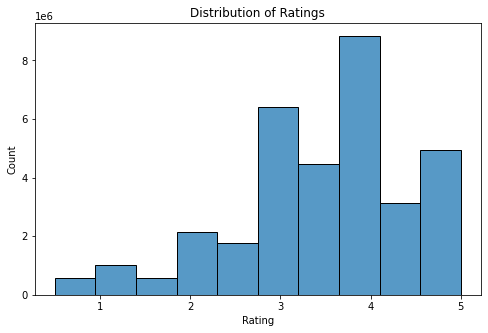

In [100]:
# Ratings Distribution
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=10)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [104]:
# the ten most famous movies by rating count
# movies.sort_values('rating_count', ascending=False).head(10)

In [105]:
# movies[movies['rating_count'] > 500].sort_values('avg_rating', ascending=False).head(10)

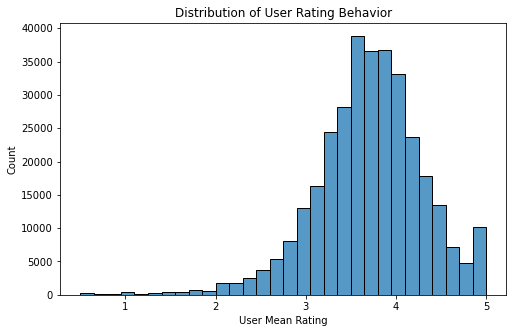

In [108]:
user_stats = ratings.groupby('userId').agg(
    avg_rating=('rating', 'mean'),
    count=('rating', 'count')
).reset_index()

user_stats.sort_values("avg_rating").head(10)   # harsh
user_stats.sort_values("avg_rating", ascending=False).head(10)  # generous

plt.figure(figsize=(8,5))
sns.histplot(user_stats['avg_rating'], bins=30)
plt.title("Distribution of User Rating Behavior")
plt.xlabel("User Mean Rating")
plt.show()

Rating trends across the Years

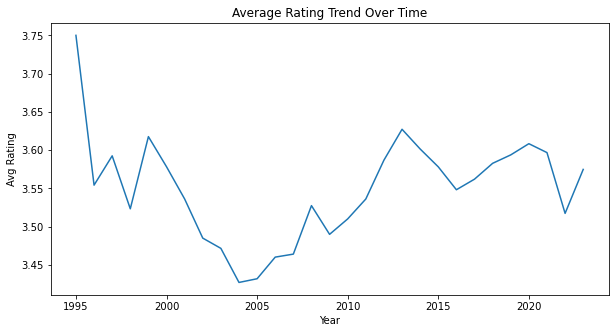

In [109]:
ratings['year'] = ratings['datetime'].dt.year
ratings['month'] = ratings['datetime'].dt.to_period('M')

trend = ratings.groupby('year').rating.mean()

plt.figure(figsize=(10,5))
trend.plot()
plt.title("Average Rating Trend Over Time")
plt.ylabel("Avg Rating")
plt.xlabel("Year")
plt.show()

Genre Peformance

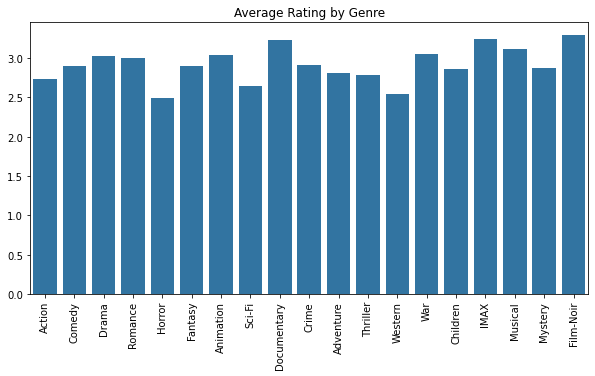

In [110]:
genre_cols = ['Action','Comedy','Drama','Romance','Horror','Fantasy','Animation','Sci-Fi',
              'Documentary','Crime','Adventure','Thriller','Western','War','Children','IMAX',
              'Musical','Mystery','Film-Noir']

genre_performance = movies[genre_cols + ['avg_rating']].groupby(genre_cols).mean()

genre_means = {genre: movies[movies[genre] == 1]['avg_rating'].mean() for genre in genre_cols}

plt.figure(figsize=(10,5))
sns.barplot(x=list(genre_means.keys()), y=list(genre_means.values()))
plt.xticks(rotation=90)
plt.title("Average Rating by Genre")
plt.show()